In [2]:
#Import bibliotek
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
#Wczytanie zbioru
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Przygotowanie zbioru danych

In [156]:
#Usunięcie kolumny z indeksami i kolumny track_id
df = df.drop(df.columns[[0, 1]], axis=1)

Sprawdzenie, czy są rekordy z pustymi danymi:

In [157]:
#Liczba rekordów z brakującymi danymi
df.isnull().any(axis=1).sum()

1

In [158]:
#Wyświetlenie rekordu z brakującymi danymi
df[df.isnull().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [159]:
#Usunięcie rekordu z brakującymi danymi
df = df.drop(65900)

Sprawdzenie, czy rekordy mają spójne wartości we wszystkich kolumnach:

In [160]:
#Sprawdzenie, czy są rekordy, które mają czas trwania utworu mniejszy lub równy zero
(df['duration_ms'] <= 0).sum()

0

In [161]:
#Liczba rekordów, które nie mają popularity w przedziale od 0 do 100
df[~df['popularity'].between(0, 100)].sum(axis=1)

,0


In [162]:
#Liczba rekordów, które nie mają explicit typu boolean
mask = ~df['explicit'].isin([True, False])
mask.sum()

0

In [163]:
#Liczba rekordów, które nie mają danceability, energy, speechiness, acousticness, instrumentalness, liveness i valence w przedziale od 0 do 1
columns_to_check = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
mask_out_of_range = (df[columns_to_check] < 0) | (df[columns_to_check] > 1)
mask_out_of_range.any(axis=1).sum()

0

In [164]:
#Liczba rekordów, które mają tempo poniżej zera
(df['tempo'] < 0).sum()

0

In [167]:
#Liczba rekordów, które nie mają time_signature w przedziale od 3 do 7
((df['time_signature'] < 3) | (df['time_signature'] > 7)).sum()

1136

In [168]:
#Usunięcie rekordów, które nie mają time_signature w przedziale od 3 do 7
df = df[(df['time_signature'] >= 3) & (df['time_signature'] <= 7)]

Analiza zbioru

Korelacje między cechami:

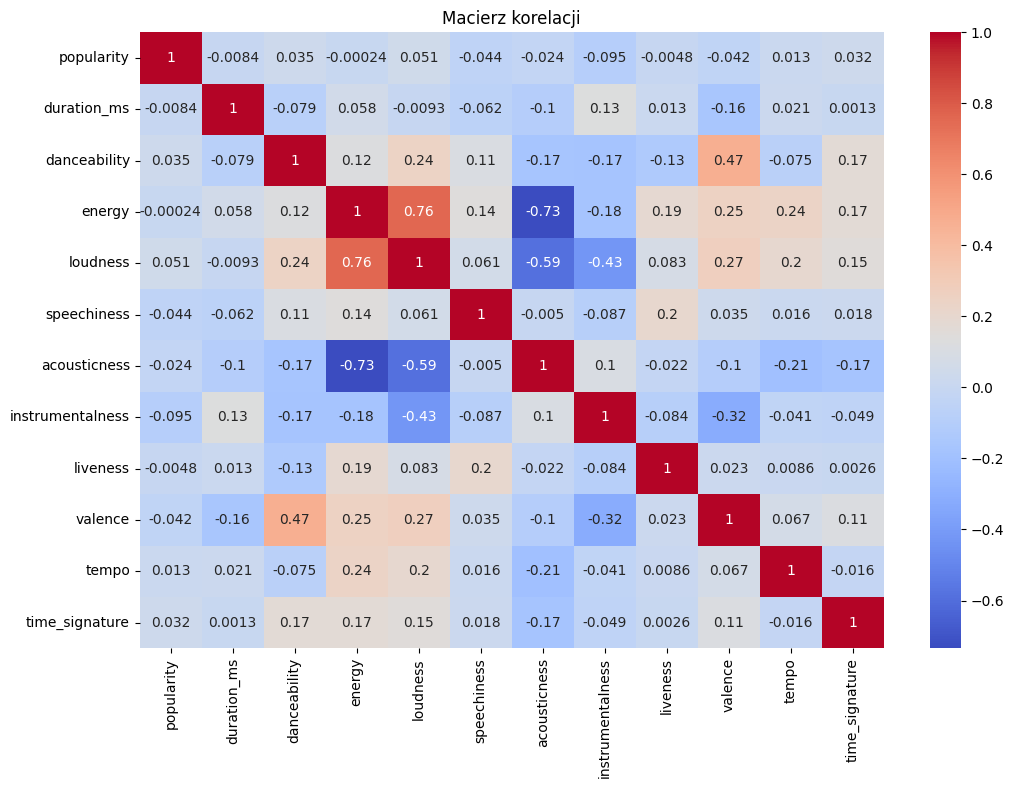

In [169]:
#Macierz korelacji
df_corr = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

Analiza macierzy korelacji:
1. Silną korelację ujemną (-0.73) mają zmienne energy i acousticness. Zmienna energy jest miarą od 0.0 do 1.0 i reprezentuje percepcyjną miarę intensywności i aktywności utworu. Zmienna acousticness jest miarą zaufania od 0.0 do 1.0, która określa, czy utwór jest akustyczny. 1.0 oznacza wysokie zaufanie, że utwór jest akustyczny. Korelacja ta sugeruje, że utwory mające lepszą akustykę są zazwyczaj mniej energiczne.

2. Wyraźną korelację ujemną (-0.59) mają zmienne acousticness i loudness. Zmienna loudness wyraża głośność utworu w decybelach. Korelacja ta sugeruje, że utwory cichsze mają z reguły lepszą akustykę.

3. Silną korelację dodatnią (0.76) mają zmienne energy i loudness. Taka korelacja sugeruje, że utwory bardziej energiczne i intensywne są zazwyczaj głośniejsze.

4. Umiarkowaną korelację dodatnią (0.47) mają zmienne danceability i valence. Zmienna danceability opisuje, jak odpowiedni jest utwór do tańca w oparciu o kombinację różnych elementów muzycznych. Wartość 0.0 oznacza najmniejszą taneczność, a 1.0 największą taneczność. Zmienna valence jest miarą od 0.0 do 1.0 opisującą muzyczną pozytywność przekazywaną przez utwór. Utwory o wysokim valence brzmią bardziej pozytywnie, podczas gdy utwory o niskiej wartościowości brzmią bardziej negatywnie. Korelacja ta sugeruje, że utwory bardziej pozytywne są zwykle lepsze do tańczenia.

Procent utworów z wulgaryzmami dla każdego gatunku

In [170]:
#Procent piosenek z wulgaryzmami dla każdego gatunku muzycznego
explicit_percent = (
    df.groupby('track_genre')['explicit']
    .mean()  # Średnia True (1) vs False (0) da nam procent
    .mul(100)  # Przeliczenie na procenty
    .reset_index()
    .rename(columns={'explicit': 'explicit_percentage'})
)

explicit_percent_sorted = explicit_percent.sort_values(by='explicit_percentage', ascending=False)

for index, row in explicit_percent_sorted.iterrows():
    print(f"Gatunek: {row['track_genre']}, Procent piosenek explicit: {row['explicit_percentage']:.2f}%")

Gatunek: comedy, Procent piosenek explicit: 65.57%
Gatunek: emo, Procent piosenek explicit: 46.59%
Gatunek: sad, Procent piosenek explicit: 45.13%
Gatunek: j-dance, Procent piosenek explicit: 39.07%
Gatunek: hardcore, Procent piosenek explicit: 32.56%
Gatunek: hip-hop, Procent piosenek explicit: 31.55%
Gatunek: funk, Procent piosenek explicit: 30.32%
Gatunek: dancehall, Procent piosenek explicit: 30.23%
Gatunek: metalcore, Procent piosenek explicit: 29.31%
Gatunek: death-metal, Procent piosenek explicit: 25.13%
Gatunek: latino, Procent piosenek explicit: 24.97%
Gatunek: industrial, Procent piosenek explicit: 23.49%
Gatunek: french, Procent piosenek explicit: 22.01%
Gatunek: turkish, Procent piosenek explicit: 21.89%
Gatunek: reggaeton, Procent piosenek explicit: 21.24%
Gatunek: dance, Procent piosenek explicit: 17.40%
Gatunek: chill, Procent piosenek explicit: 17.20%
Gatunek: reggae, Procent piosenek explicit: 16.75%
Gatunek: alternative, Procent piosenek explicit: 16.43%
Gatunek: grin

Największy procent piosenek (65,57 %) z wulgaryzmami ma gatunek comedy. Na drugim miejscu jest gatunek emo (46,59 %), a na trzecim gatunek sad (45,13 %).

Spory procent piosenek z wulgaryzmami mają też takie gatunki, jak hip-hop, hardcore (gatunek wyrażający intensywne emocje w brzmieniu i tekstach) , czy j-dance (gatunek związany z japońską muzyką).

Można też zauważyć, że w zbiorze tym jest kilka piosenek z Disneya, które zawierają wulgaryzmy.

In [174]:
#Najdłuższy utwór
max_index = df['duration_ms'].idxmax()
df.loc[max_index]

,73617
artists,Tale Of Us
album_name,Unity (Voyage Mix)
track_name,Unity (Voyage Mix) Pt. 1
popularity,35
duration_ms,5237295
explicit,False
danceability,0.695
energy,0.736
key,5
loudness,-11.371


Najdłuższym utworem jest utwór z gatunku minimal-techno pod tytułem "Unity (Voyage Mix) Pt. 1" autorstwa Tale Of Us. Utwór ten trwa 5237295 ms, czyli ok. 1 godzina, 27 minut i 17 sekund.

In [175]:
#Najkrótszy utwór
min_index = df['duration_ms'].idxmin()
df.loc[min_index]

,59775
artists,Leila Bela;Leila's Opera Class
album_name,Angra Manyu
track_name,Screams for a Finale! (feat. Leila's Opera Class)
popularity,0
duration_ms,15800
explicit,False
danceability,0.251
energy,0.508
key,5
loudness,-10.564


Najkrótszym utworem jest irański utwór pod tytułem "Screams for a Finale! (feat. Leila's Opera Class)" autorstwa Leila Bela i Leila's Opera Class. Ma on 15800 ms, czyli ok. 16 sekund.

In [176]:
#Średni czas trwania utworu
df['duration_ms'].mean()

228281.05256815784

Średni czas trwania utworu to ok. 228281 ms, czyli ok. 3 minuty i 48 sekund.

In [177]:
#Najgłośniejszy utwór
max_index = df['loudness'].idxmax()
df.loc[max_index]

,17574
artists,Five Star Hotel
album_name,Gray Data
track_name,Fate Dance
popularity,16
duration_ms,237000
explicit,False
danceability,0.31
energy,0.999
key,4
loudness,4.532


Najgłośniejszym utworem jest utwór z muzyki klubowej pod tytułem "Fate Dance" autorstwa Five Star Hotel. Ma on 4.532 dB.

In [178]:
#Najcichszy utwór
min_index = df['loudness'].idxmin()
df.loc[min_index]

,101722
artists,Atmosphere Asmr
album_name,Fan Sounds & White Noise 2 (Deluxe Edition)
track_name,Ceiling Fan Sound on Low Power
popularity,34
duration_ms,120000
explicit,False
danceability,0.162
energy,0.00483
key,6
loudness,-46.591


Najcichszym utworem jest utwór do spania pod tytułem "Ceiling Fan Sound on Low Power" autorstwa Atmosphere Asmr. Ma on -46.591 dB.

In [179]:
#Średnia głośność
df['loudness'].mean()

-8.199520950178536

Średnia głośność to ok. -8.2 dB.

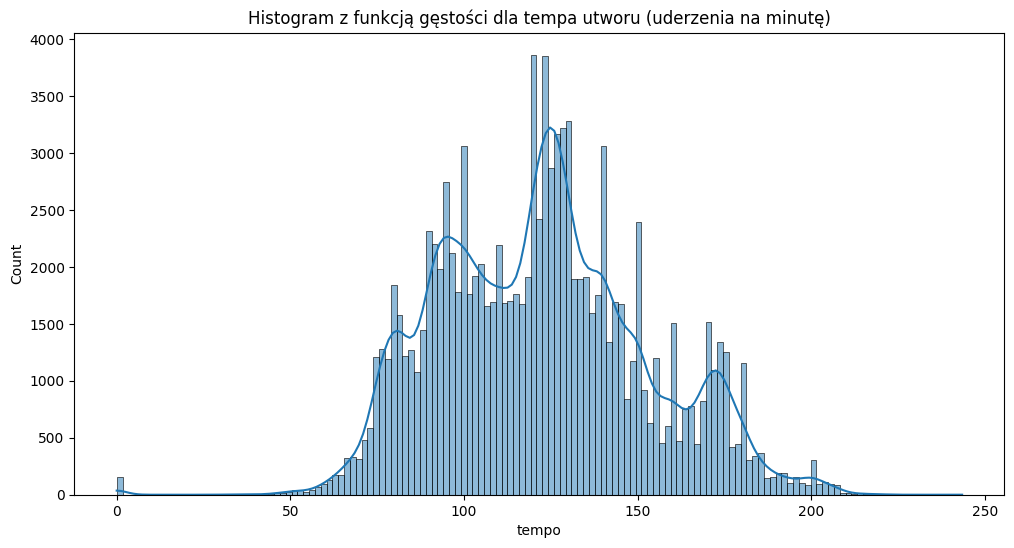

In [ ]:
#Histogram tempa (uderzenia na minutę)
plt.figure(figsize=(12, 6))
sns.histplot(df['tempo'], kde=True)
plt.title("Histogram z funkcją gęstości dla tempa utworu (uderzenia na minutę)")
plt.show()

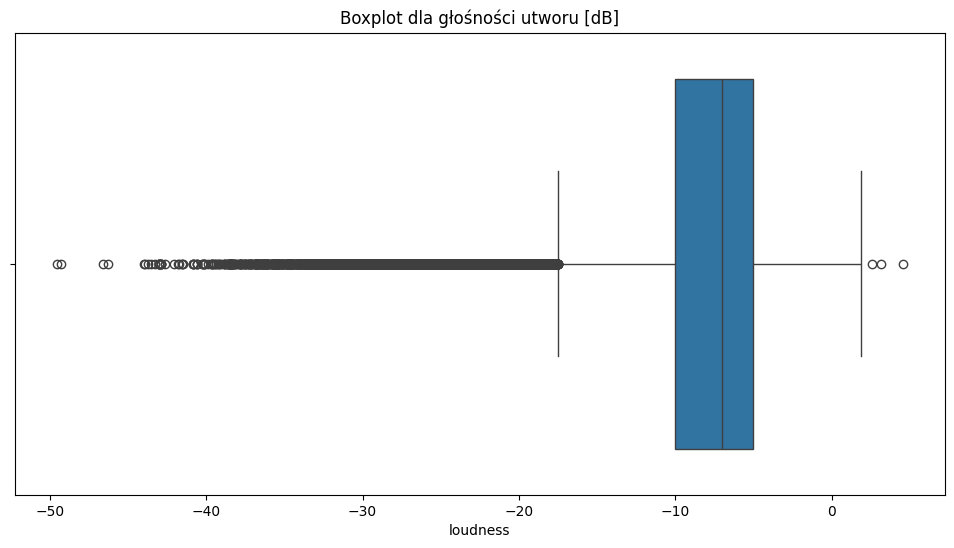

In [ ]:
#Boxplot dla głośności utworu [dB]
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['loudness'])
plt.title("Boxplot dla głośności utworu [dB]")
plt.show()